In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import seaborn as sns

### Saddle-node bifurcation

The _normal form_ of the saddle-node bifurcation is $\dot{x}=x^2+p$. The parameter $p$ determines the number of the equilibria of the system: in particular, as $p$ increases from a negative to a positive value, we see that the number of equilibria changes.

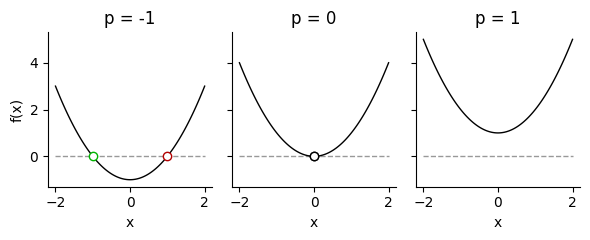

In [2]:
fun = lambda x,p: x**2 + p
jac = lambda x,p: 2*x
coeffs = [1, 0, 0]

x = np.linspace(-2, 2, 100)
P = np.array([-1, 0, 1])

rows,cols = 1,P.size
width,height = 2,2.5
fig,ax = plt.subplots(rows, cols, figsize=(cols*width, rows*height), sharex=True, sharey=True)
for i,p in enumerate(P):
    coeffs[-1] = p
    pts = np.roots(coeffs)
    ax[i].plot(x[[0,-1]], np.zeros(2), '--', lw=1, color=[.6,.6,.6])
    ax[i].plot(x, fun(x,p), 'k', lw=1)
    for pt in pts:
        if np.isreal(pt):
            J = jac(pt,p)
            if J < 0:
                col = [0,.7,0]
            elif J > 0:
                col = [.7,0,0]
            else:
                col = [0,0,0]
            ax[i].plot(pt, 0, 'o', color=col, markerfacecolor='w', markersize=6, markeredgewidth=1)
    ax[i].set_xlabel('x')
    ax[i].set_title('p = {}'.format(p))
ax[0].set_ylabel('f(x)')
sns.despine()
fig.tight_layout()

### Hopf bifurcation

The normal form of the Hopf bifurcation, in polar coordinates, is

$
\dot{r} = (p - r^2)r \\
\dot{\theta} = \omega,
$

where $r$ is the amplitude of the oscillation, $\omega$ is the (constant) angular velocity and $p$ is the bifurcation parameter. For $p>0$, the system has two equilibria, $r=0$ and $r=\sqrt{p}$, i.e., an (unstable) equilibrium and a (stable) limit cycle. For $p<0$, only the equilibrium remains, which in this case is stable.

In cartesian coordinates, the system becomes

$
\dot{x} = (p - x^2 - y^2)x - \omega y \\
\dot{y} = (p - x^2 - y^2)y + \omega x
$

Let's start by defining the vector field and the Jacobian matrix of the system:

In [3]:
super_hopf = lambda t,x,p,ω=1: np.array([(p-x[0]**2-x[1]**2)*x[0]-ω*x[1], (p-x[0]**2-x[1]**2)*x[1]+ω*x[0]])
super_hopf_jac = lambda t,x,p,ω=1: np.array([
    [p-3*x[0]**2-x[1]**2, -2*x[0]*x[1]-ω],
    [-2*x[0]*x[1]+ω, p-x[0]**2-3*x[1]**2]
])

Then, we compute the stability of the equilibrium located in [0,0] as the parameter $p$ is changed from negative to positive values:

In [4]:
P = np.linspace(-1, 1, 201)
eq = np.array([0,0])
stable = np.zeros_like(P, dtype=bool)
for i,p in enumerate(P):
    J = super_hopf_jac(_, eq, p)
    eigval,_ = np.linalg.eig(J)
    stable[i] = all(np.array(list(map(np.real, eigval))) < 0)
unstable = np.logical_not(stable)

Let's plot the results:

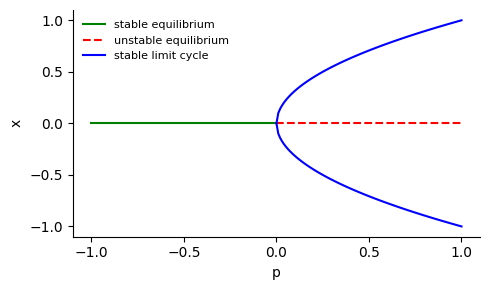

In [5]:
x = np.zeros_like(P)
fig,ax = plt.subplots(1, 1, figsize=(5,3))
ax.plot(P[stable], x[stable], 'g', label='stable equilibrium')
ax.plot(P[unstable], x[unstable], 'r--', label='unstable equilibrium')
ax.plot(P[unstable],  np.sqrt(P[unstable]), 'b', label='stable limit cycle')
ax.plot(P[unstable], -np.sqrt(P[unstable]), 'b')
ax.legend(loc='upper left', frameon=False, fontsize=8)
ax.set_xlabel('p')
ax.set_ylabel('x')
ax.set_xticks(np.linspace(P[0], P[-1], 5))
sns.despine()
fig.tight_layout()

The Hopf bifurcation can be either __supercritical__ or __subcritical__: in the former case, the cycle that is born from the equilibrium is stable, while in the latter it is unstable.

The normal form of the subcritical Hopf bifurcation is

$
\dot{r} = -(p - r^2)r \\
\dot{\theta} = \omega,
$

where it is easy to see that the equilibrium that exists for $r=0$ is stable if $p<0$.

In cartesian coordinates, the system becomes

$
\dot{x} = -(p - x^2 - y^2)x - \omega y \\
\dot{y} = -(p - x^2 - y^2)y + \omega x
$

Let's now repeat the analysis we just performed for the supercritical Hopf bifurcation:

In [6]:
sub_hopf = lambda t,x,p,ω=1: np.array([-(p-x[0]**2-x[1]**2)*x[0]-ω*x[1], -(p-x[0]**2-x[1]**2)*x[1]+ω*x[0]])
sub_hopf_jac = lambda t,x,p,ω=1: np.array([
    [-p+3*x[0]**2+x[1]**2, 2*x[0]*x[1]-ω],
    [2*x[0]*x[1]+ω, -p+x[0]**2+3*x[1]**2]
])

In [7]:
P = np.linspace(-1, 1, 2001)
eq = np.array([0,0])
stable = np.zeros_like(P, dtype=bool)
for i,p in enumerate(P):
    J = sub_hopf_jac(_, eq, p)
    eigval,_ = np.linalg.eig(J)
    stable[i] = all(np.array(list(map(np.real, eigval))) < 0)
unstable = np.logical_not(stable)

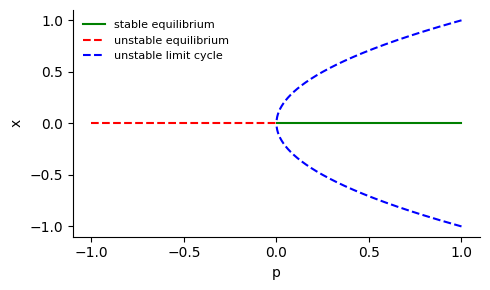

In [8]:
x = np.zeros_like(P)
fig,ax = plt.subplots(1, 1, figsize=(5,3))
ax.plot(P[stable], x[stable], 'g', label='stable equilibrium')
ax.plot(P[unstable], x[unstable], 'r--', label='unstable equilibrium')
ax.plot(P[stable],  np.sqrt(P[stable]), 'b--', label='unstable limit cycle')
ax.plot(P[stable], -np.sqrt(P[stable]), 'b--')
ax.legend(loc='upper left', frameon=False, fontsize=8)
ax.set_xlabel('p')
ax.set_ylabel('x')
ax.set_xticks(np.linspace(P[0], P[-1], 5))
sns.despine()
fig.tight_layout()